In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# read the dataset
cric_df = pd.read_csv("Cricket_Hierarchical.csv", sep=",", encoding="ISO-8859-1", header=0)
cric_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
final_df = cric_df[['Player','Ave','SR']]
final_df.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


{'whiskers': [<matplotlib.lines.Line2D at 0x1949e57c898>,
 'caps': [<matplotlib.lines.Line2D at 0x1949e57cf28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1949e57c470>],
 'medians': [<matplotlib.lines.Line2D at 0x1949e5865f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1949e586940>],
 'means': []}

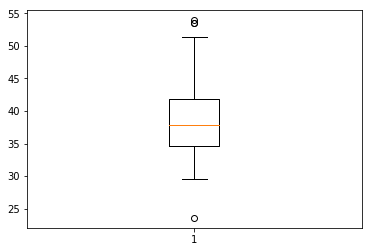

In [22]:
# 1. outlier treatment
plt.boxplot(final_df['Ave'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1949e82c9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1949e82cdd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1949e82c5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1949e836710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1949e836a58>],
 'means': []}

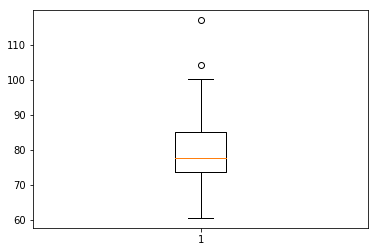

In [23]:
plt.boxplot(final_df['SR'])

In [5]:
# 2. rescaling
AvSR_df = final_df[['Ave','SR']]

# instantiate
scaler = StandardScaler()

# fit_transform
scaled_df = scaler.fit_transform(AvSR_df)
scaled_df.shape

(79, 2)

In [6]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Ave','SR']
scaled_df.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [26]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
kmeans.labels_

array([3, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 0, 3, 0, 2, 1, 1, 2, 1,
       0, 1, 2, 3, 0, 2, 0, 1, 0, 0, 1, 0, 3, 0, 0, 1, 3, 1, 0, 0, 3, 0,
       0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 3, 3, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0])

In [28]:
# assign the label
final_df['cluster_id'] = kmeans.labels_
final_df.head()

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,3
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
3,ST Jayasuriya (Asia/SL),32.36,91.20,2
4,DPMD Jayawardene (Asia/SL),33.37,78.96,0


In [29]:
final_df

,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,3
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
3,ST Jayasuriya (Asia/SL),32.36,91.20,2
4,DPMD Jayawardene (Asia/SL),33.37,78.96,0
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1
7,SC Ganguly (Asia/INDIA),41.02,73.70,1
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1
9,BC Lara (ICC/WI),40.48,79.51,1


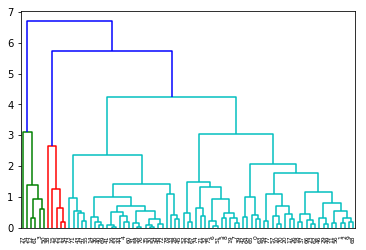

In [7]:
# complete linkage
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [8]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [9]:
# assign cluster labels
final_df['cluster_labels'] = cluster_labels
final_df.head()

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Player,Ave,SR,cluster_labels
0,SR Tendulkar (INDIA),44.83,86.23,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,0
2,RT Ponting (AUS/ICC),42.03,80.39,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2


In [10]:
final_df

,Player,Ave,SR,cluster_labels
0,SR Tendulkar (INDIA),44.83,86.23,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,0
2,RT Ponting (AUS/ICC),42.03,80.39,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,0
9,BC Lara (ICC/WI),40.48,79.51,0


In [12]:
writer = pd.ExcelWriter('Cric_Output.xlsx', engine='xlsxwriter')
final_df.to_excel(writer, sheet_name='Sheet1')
writer.save()